# Build model

In this note book we build a model to predict if a leaf is healthy or not

In [1]:
import tensorflow as tf 
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# define dirs
base_dir = './cherry-leaves/'
train_dir = os.path.join(base_dir, 'training/')
test_dir = os.path.join(base_dir, 'validation/')


to increase the performance of our model we will perform data augmentation to increase the number of training samples when loading our data

In [3]:
#prepare training and validation data
train_data_gen = ImageDataGenerator(rescale=1./225,
                              width_shift_range=0.3,
                              height_shift_range=0.3,
                              rotation_range=60,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              vertical_flip=True,
                              fill_mode='nearest')

train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=30,
    class_mode='binary'
)

test_data_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_data_gen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=30,
    class_mode='binary'
)


Found 3786 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [4]:
class RuntimeMinimizer(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') >= 0.99: 
            print("\nReached 99% validation accuracy. Stopping training!")
            self.model.stop_training = True

In [5]:
# make model deep neural net conv 

model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(256,256,3)),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')

  ])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

In [6]:
history = model.fit(train_generator,
                    epochs=20,
                    verbose=1,
                    validation_data=test_generator,
                    callbacks=[RuntimeMinimizer()])

Epoch 1/20
127/127 [==============================] - 83s 650ms/step - loss: 0.3926 - accuracy: 0.8560 - val_loss: 0.0525 - val_accuracy: 0.9787
Epoch 2/20
127/127 [==============================] - 84s 658ms/step - loss: 0.0488 - accuracy: 0.9889 - val_loss: 0.0955 - val_accuracy: 0.9716
Epoch 3/20
127/127 [==============================] - ETA: 0s - loss: 0.0673 - accuracy: 0.9754
Reached 99% validation accuracy. Stopping training!
127/127 [==============================] - 87s 685ms/step - loss: 0.0673 - accuracy: 0.9754 - val_loss: 0.0246 - val_accuracy: 0.9905


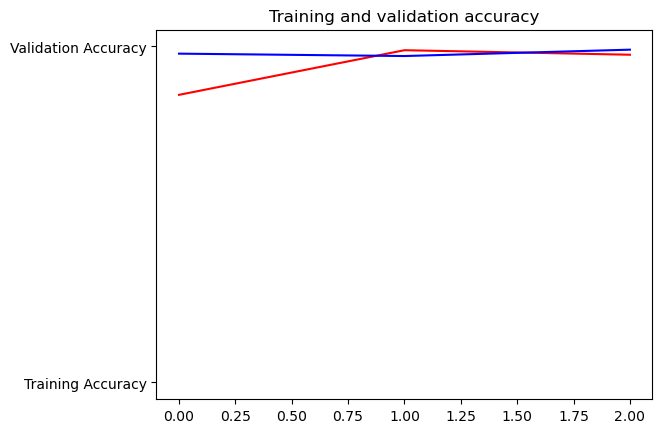

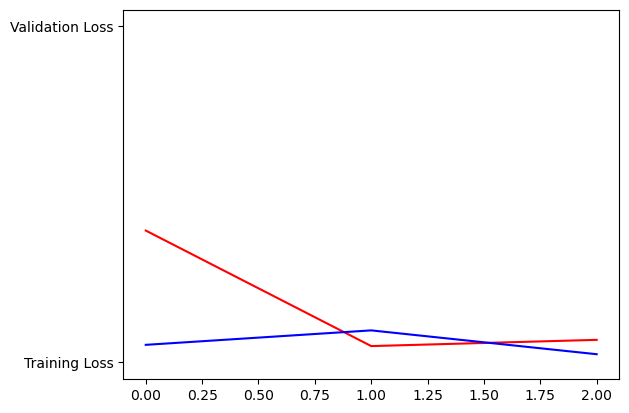

In [7]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

Resuls show 99 % accuracy on validation set and 97% on training set model can be said to meet business requirements

In [8]:
import pickle

In [10]:
model.save("models/cherry-picker-v1.h5")